In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


QUESTION 2

In [3]:
from sklearn.model_selection import train_test_split

# Sample 100 images randomly for each class (total 1000 images) from the MNIST training data set.
mnist_data = mnist.data.to_numpy()
mnist_target = mnist.target.to_numpy()

# train set과 test set을 분리해야 한다.
mnist_data, mnist_data_test, mnist_target, mnist_target_test = train_test_split(mnist_data, mnist_target, train_size=0.5)

# type을 np.uint8로 바꾸어야 for문을 돌리기에 편하다.
mnist_target = mnist_target.astype(np.uint8)
mnist_target_test = mnist_target_test.astype(np.uint8)

# label별로 나누어보자.

# index들을 list별로 나누지 않고 한꺼번에 합친 list : 다 합쳐진 index들이 존재.
total_sampled_index = [] 
# 추후 확인하기 편하도록 label별로 나눠놓은 list
separated_sampled_index = []

for label in range(10):
    labeled_index = np.where(mnist_target == label)[0]
    sampled_labeled_index = np.random.choice(labeled_index, size=100, replace=False)
    total_sampled_index.extend(sampled_labeled_index)
    separated_sampled_index.append(sampled_labeled_index)


# total_sampled_index를 바탕으로 data랑 target 뽑아내기
X_sampled = mnist_data[total_sampled_index]
y_sampled = mnist_target[total_sampled_index]



In [4]:
# test 해보기
print(mnist_data.shape)
print(mnist_data_test.shape)
print(mnist_target.shape)
print(mnist_target_test.shape)


(35000, 784)
(35000, 784)
(35000,)
(35000,)


In [5]:
# test 해보기
print(total_sampled_index)
print(separated_sampled_index)

[8551, 33699, 3553, 24007, 4091, 2212, 32918, 9498, 10849, 18311, 6893, 9601, 28009, 2735, 15890, 8578, 15409, 18295, 27442, 8010, 20403, 25634, 7894, 11538, 620, 8509, 19028, 16449, 473, 32253, 6319, 33394, 5057, 30355, 20994, 31529, 10661, 26425, 5106, 32172, 7849, 17328, 30245, 23730, 20803, 19812, 12362, 7878, 25447, 6350, 9571, 31615, 13496, 5233, 22474, 13168, 26755, 25648, 16438, 4599, 29526, 31604, 20626, 22967, 27327, 33730, 265, 34112, 30163, 12329, 16893, 10045, 16145, 14023, 32683, 30703, 25580, 4962, 28257, 26026, 5288, 4855, 14095, 21449, 10629, 27325, 28806, 21044, 1719, 8362, 11295, 33518, 11995, 31625, 9306, 26435, 22656, 9975, 17965, 8387, 23954, 12663, 4881, 25105, 4102, 7519, 34667, 24334, 15072, 21825, 18534, 27715, 16620, 26534, 6066, 31755, 21678, 28866, 29702, 17084, 11992, 6934, 3815, 11325, 29189, 21108, 3694, 18373, 5147, 18468, 8307, 23315, 34190, 21989, 24530, 16186, 26692, 25546, 31026, 23862, 5044, 2609, 10254, 13484, 15921, 24769, 20140, 16408, 6885, 259

1


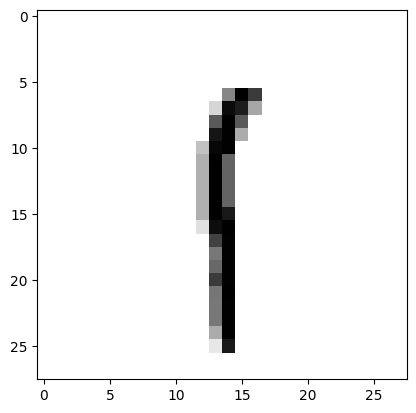

In [6]:
# test 해보기
plt.imshow((X_sampled[112].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
print(y_sampled[112])

QUESTION 3

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

# clustering 할 숫자를 정의
cluster_k = 10

# Agglomerative clustering
Agglo_clustering = AgglomerativeClustering(n_clusters=cluster_k)
Agg_label = Agglo_clustering.fit_predict(X_sampled)

# k-means clustering
KMeans_clustering = KMeans(n_clusters=cluster_k)
KM_label = KMeans_clustering.fit_predict(X_sampled)

# Gaussian mixture model
Gaussian_Mixture_clustering = GaussianMixture(n_components=cluster_k)
GM_label = Gaussian_Mixture_clustering.fit_predict(X_sampled)

# Spectral clustering
Spectral_clustering = SpectralClustering(n_clusters=cluster_k, affinity='nearest_neighbors')
SC_label = Spectral_clustering.fit_predict(X_sampled)



In [8]:
# cluster의 label들을 확인해보자.
print("Agg_label : \n{}".format(Agg_label))
print("KM_label : \n{}".format(KM_label))
print("GM_label : \n{}".format(GM_label))
print("SC_label : \n{}".format(SC_label))

# 실제 true label은?
print("y_sampled : \n{}".format(y_sampled))

Agg_label : 
[3 3 3 3 7 3 3 6 3 3 3 3 3 3 3 3 3 3 3 6 3 3 3 3 3 3 3 3 3 3 3 6 3 6 3 7 3
 6 3 3 6 7 3 3 3 3 3 3 3 4 3 3 3 3 6 7 3 3 3 4 8 4 3 3 3 6 3 3 3 4 3 6 3 8
 3 3 4 4 7 3 6 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 5 2 2 2 2 2 2
 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 5 5 5 5 5 5 1 0 5 5 5 5 5 5 2 5 5 5 5 1
 0 5 4 5 5 5 5 5 5 5 5 8 5 0 5 1 5 5 5 5 1 5 5 5 5 5 5 1 5 1 0 0 5 6 5 5 5
 5 8 5 5 0 1 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 1 5 5 5 8 5 5 5 0 5 1 1 8 5 5
 5 5 5 0 4 4 0 4 4 0 4 6 4 1 4 4 6 0 6 4 4 0 0 0 4 6 4 4 3 4 6 6 6 4 6 6 4
 4 4 4 4 4 8 6 4 4 4 4 4 5 5 0 6 6 4 6 4 6 6 6 0 4 6 6 0 0 6 6 4 4 6 4 4 4
 4 6 0 4 6 6 4 6 6 4 6 4 6 6 4 4 6 0 4 4 6 4 4 6 4 4 0 4 6 6 0 1 1 0 0 1 2
 1 1 1 1 1 1 1 1 9 1 1 0 1 1 1 1 1 1 9 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 2
 0 1 0 1 0 8 1 1 9 0 1 1 1 1 1 0 1 1 1 9 1 1 0 1 1 1 1 1 1 1 0 1 2 1 1 1 1
 0 9 1 9 1 2

QUESTION 4

In [9]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# clustering으로 나온 label들을 y_sampled와 구별할 수 있도록 재구성한다.
new_Agg_label = np.zeros((1000,))
new_KM_label = np.zeros((1000,))
new_GM_label = np.zeros((1000,))
new_SC_label = np.zeros((1000,))

old_labels = [Agg_label, KM_label, GM_label, SC_label]
new_labels = [new_Agg_label, new_KM_label, new_GM_label, new_SC_label]
for o_labels, n_labels in zip(old_labels, new_labels):
    for i in range(10):
        loc_of_labels = np.where(o_labels == i)[0]
        real_labels = y_sampled[loc_of_labels]
        most_common_label = np.argmax(np.bincount(real_labels))
        n_labels[loc_of_labels] = most_common_label

# 새로이 만들어진 new_labels의 rand index와 MI based Score를 구한다.
rand_index = {}
MI_based_score = {}
names = ["Agg clustering", "KMeans clustering", "Gaussian Mixture", "Spectral clustering"]
for name, n_labels in zip(names, new_labels):
    rand_index[name] = adjusted_rand_score(y_sampled, n_labels)
    MI_based_score[name] = adjusted_mutual_info_score(y_sampled, n_labels)


for name, score in rand_index.items():
    print("{} rand index : {}".format(name, score))

print("\n")

for name, score in MI_based_score.items():
    print("{} MI based score : {}".format(name, score))


Agg clustering rand index : 0.3939362272883443
KMeans clustering rand index : 0.30635472564921656
Gaussian Mixture rand index : 0.3488798364252272
Spectral clustering rand index : 0.40792515348592584


Agg clustering MI based score : 0.5398378069342497
KMeans clustering MI based score : 0.42850152984298395
Gaussian Mixture MI based score : 0.46484454191759433
Spectral clustering MI based score : 0.5557711947616922


QUESTION 5

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# 각 cluster의 center를 찾아놓자.
# 앞선 방법대로 old_label에서 최빈값이 그 cluster center의 label이 된다.
clusterCenterCordDict = {}
clusterCenterLabelDict = {}
for name, o_labels in zip(names,old_labels):
    models_cluster_center_cord = []
    models_cluster_center_label = []
    for i in range(10):
        loc_of_labels = np.where(o_labels == i)[0]
        real_labels = y_sampled[loc_of_labels]
        models_cluster_center_label.append(np.argmax(np.bincount(real_labels)))
        cluster_center = np.zeros((784,))
        for i in X_sampled[loc_of_labels]:
            cluster_center += i
        models_cluster_center_cord.append(cluster_center/loc_of_labels.size)
    clusterCenterCordDict[name] = models_cluster_center_cord
    clusterCenterLabelDict[name] = models_cluster_center_label
        

Agg clustering cluster center label : 7
Agg clustering cluster center label : 4
Agg clustering cluster center label : 1
Agg clustering cluster center label : 0
Agg clustering cluster center label : 3
Agg clustering cluster center label : 2
Agg clustering cluster center label : 8
Agg clustering cluster center label : 6
Agg clustering cluster center label : 6
Agg clustering cluster center label : 7
KMeans clustering cluster center label : 2
KMeans clustering cluster center label : 9
KMeans clustering cluster center label : 0
KMeans clustering cluster center label : 1
KMeans clustering cluster center label : 3
KMeans clustering cluster center label : 6
KMeans clustering cluster center label : 4
KMeans clustering cluster center label : 7
KMeans clustering cluster center label : 1
KMeans clustering cluster center label : 8
Gaussian Mixture cluster center label : 4
Gaussian Mixture cluster center label : 1
Gaussian Mixture cluster center label : 3
Gaussian Mixture cluster center label : 7
Ga

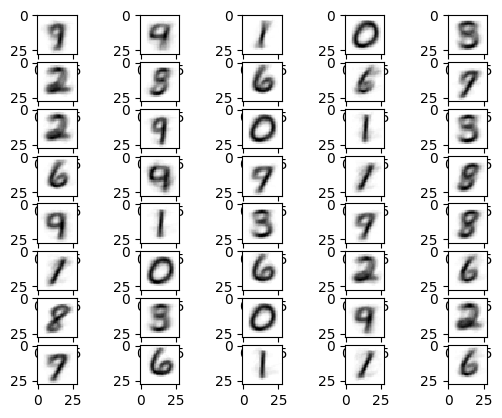

In [11]:
# plot the cluster_center >> 체크하는 목적
iter = 1
for name in names:
    for cluster_center_cord, cluster_center_label in zip(clusterCenterCordDict[name],clusterCenterLabelDict[name]):
        print("{} cluster center label : {}".format(name, cluster_center_label))
        plt.subplot(8,5,iter)
        iter+=1
        plt.imshow((cluster_center_cord.reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

In [12]:
# KNN classifier를 만들자 >> cluster center들을 이용해서
KNN_Dict = {}
for name in names:
    KNN_Dict[name] = KNeighborsClassifier(n_neighbors=1).fit(clusterCenterCordDict[name], clusterCenterLabelDict[name])

# test set을 이용해 accuracy를 구하면 된다.
for name in names:
    accuracy = KNN_Dict[name].score(mnist_data_test, mnist_target_test)
    print("{}'s accuracy : {}".format(name, accuracy))

Agg clustering's accuracy : 0.5845714285714285
KMeans clustering's accuracy : 0.5645714285714286
Gaussian Mixture's accuracy : 0.5836571428571429
Spectral clustering's accuracy : 0.6033714285714286


QUESTION 6

In [30]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=10).fit(X_sampled)
kernelpca = KernelPCA(n_components=10, fit_inverse_transform=True, kernel='cosine').fit(X_sampled)

In [31]:
# PCA의 component(eigenvector)와 explained variance(eigenvalue)를 구해보자.
print("PCA component : \n{}".format(pca.components_))
print("PCA component shape : \n{}".format(pca.components_.shape))
print("PCA explained_variance : \n{}".format(pca.explained_variance_))
print("PCA explained_variance shape : \n{}".format(pca.explained_variance_.shape))



PCA component : 
[[ 2.41520443e-19  1.86031083e-19  2.53778972e-20 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.69589196e-18 -4.96360730e-18  1.13419005e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 2.86534768e-17 -4.15538438e-18 -1.34281188e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [ 2.37193785e-17 -1.27620068e-17  1.02294004e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 4.72190838e-17  6.83353148e-17 -4.76781652e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.08933336e-17  2.77620473e-18  1.10572546e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
PCA component shape : 
(10, 784)
PCA explained_variance : 
[333957.14532297 246678.17443745 209268.27302286 181943.88013068
 173132.05266468 144336.72816796 112496.7405155   97579.01198127
  94790.01755083  83827.78084072]
PCA explained_variance shape : 
(10,)


In [32]:
# KernelPCA의 eigenvector와 eigenvalue를 구해보자.
print("KernelPCA eigenvectors : \n{}".format(kernelpca.eigenvectors_))
print("KernelPCA eigenvectors shape : \n{}".format(kernelpca.eigenvectors_.shape))
print("KernelPCA eigenvalues : \n{}".format(kernelpca.eigenvalues_))
print("KernelPCA eigenvalues shape : \n{}".format(kernelpca.eigenvalues_.shape))

KernelPCA eigenvectors : 
[[-0.037827   -0.04681707 -0.02416327 ... -0.05656081 -0.04938798
  -0.02025919]
 [-0.05119477 -0.03207596 -0.0180251  ...  0.01990983 -0.03502475
   0.01426677]
 [-0.06518522 -0.05548275 -0.01225813 ... -0.03324899 -0.03342736
   0.01609813]
 ...
 [ 0.00826907  0.04397003  0.03990599 ... -0.02288572 -0.05598692
  -0.00168453]
 [ 0.01196643  0.05027065 -0.02512166 ... -0.00023659  0.04784513
   0.04664773]
 [ 0.01408052  0.02170247 -0.03841393 ... -0.0088788   0.02589778
   0.07547444]]
KernelPCA eigenvectors shape : 
(1000, 10)
KernelPCA eigenvalues : 
[54.7234817  45.36450321 33.91851945 29.24127715 28.10814844 25.79673262
 18.21517656 16.89587797 15.25659373 14.91956555]
KernelPCA eigenvalues shape : 
(10,)


In [33]:
# 차원 축소를 하면 어떤 형태로 나올까.
dim_X_pca = pca.transform(X_sampled)
dim_X_kernelpca = kernelpca.transform(X_sampled)
print(dim_X_pca.shape)
print(dim_X_kernelpca.shape)
print(dim_X_kernelpca)

(1000, 10)
(1000, 10)
[[-0.27982646 -0.31532782 -0.14072591 ... -0.2324909  -0.19290792
  -0.07825283]
 [-0.37871495 -0.21604178 -0.10497747 ...  0.08183856 -0.13680558
   0.05510662]
 [-0.48220978 -0.37369395 -0.07139086 ... -0.13666861 -0.13056623
   0.06218039]
 ...
 [ 0.06117075  0.2961521   0.23241091 ... -0.09407081 -0.21868316
  -0.00650663]
 [ 0.08852209  0.3385888  -0.14630758 ... -0.00097248  0.18688159
   0.18018085]
 [ 0.10416109  0.14617305 -0.22372125 ... -0.03649596  0.10115591
   0.29152645]]


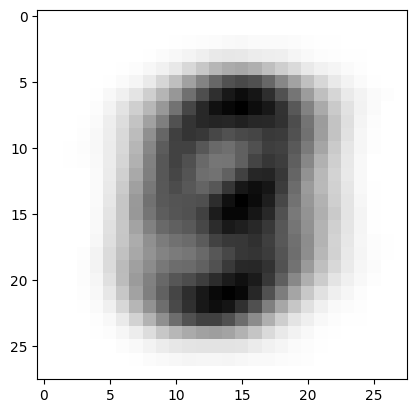

In [34]:
# mean image를 plot해보자.
mean_image = np.zeros((784,))
for i in X_sampled:
    mean_image += i

plt.imshow((mean_image.reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

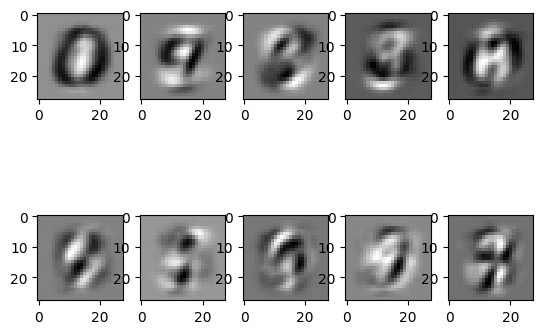

In [35]:
# 첫 10개의 eigenvector를 plot해보자.
# PCA의 경우
for i, eigenvector in enumerate(pca.components_):
    if i>9:
        break
    plt.subplot(2,5,i+1)
    plt.imshow(eigenvector.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    

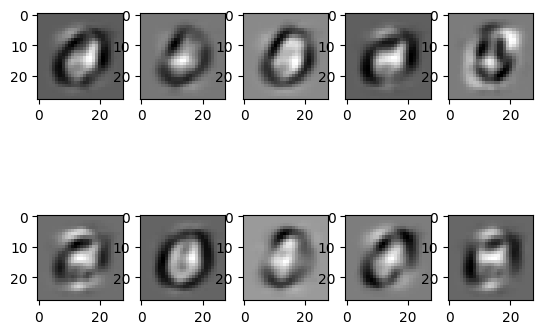

In [38]:
# kernelPCA의 eigenvector를 보여주려면 우선 original space로 다시 보내야 한다.
kernelPCA_eigenvector_original = kernelpca.inverse_transform(kernelpca.eigenvectors_)
for i, eigenvector in enumerate(kernelPCA_eigenvector_original):
    if i>9:
        break
    plt.subplot(2,5,i+1)
    plt.imshow(eigenvector.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

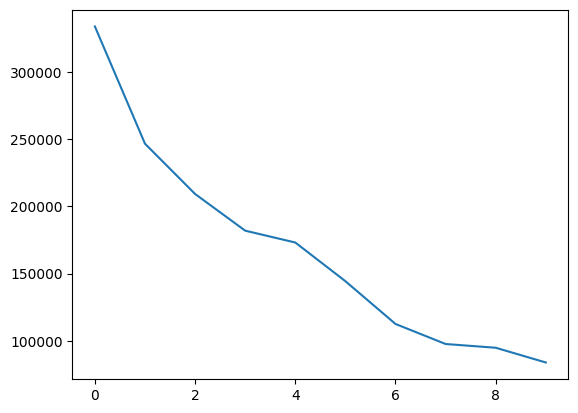

In [39]:
# PCA의 eigenvalue 값을 plot 해보자
plt.plot(pca.explained_variance_)
plt.show()

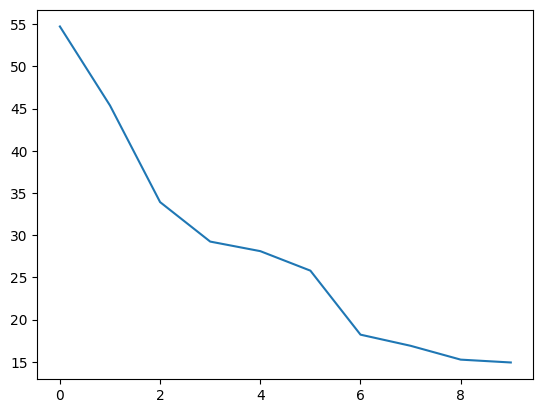

In [40]:
# KernelPCA의 eigenvalue 값을 plot 해보자
plt.plot(kernelpca.eigenvalues_)
plt.show()

QUESTION 7

In [41]:
# 차원축소된 PCA, kernelPCA의 sample들
dim_X_pca = pca.transform(X_sampled)
dim_X_kernelpca = kernelpca.transform(X_sampled)

# PCA KMeans clustering
PCA_KMeans = KMeans(n_clusters=cluster_k)
PCA_KM_label = PCA_KMeans.fit_predict(dim_X_pca)

# KernelPCA KMeans clustering
KernelPCA_KMeans = KMeans(n_clusters=cluster_k)
KernelPCA_KM_label = KernelPCA_KMeans.fit_predict(dim_X_pca)

In [52]:
# 앞선 code들을 재활용하자.
# clustering으로 나온 label들을 y_sampled와 구별할 수 있도록 재구성한다.
new_PCA_label = np.zeros((1000,))
new_KernelPCA_label = np.zeros((1000,))
PCA_old_labels = [PCA_KM_label, KernelPCA_KM_label]
PCA_new_labels = [new_PCA_label, new_KernelPCA_label]
for o_labels, n_labels in zip(PCA_old_labels, PCA_new_labels):
    for i in range(10):
        loc_of_labels = np.where(o_labels == i)[0]
        real_labels = y_sampled[loc_of_labels]
        most_common_label = np.argmax(np.bincount(real_labels))
        n_labels[loc_of_labels] = most_common_label

# 새로이 만들어진 new_labels의 rand index와 MI based Score를 구한다.
rand_index = {}
MI_based_score = {}
names = ["PCA", "KernelPCA"]
for name, n_labels in zip(names, PCA_new_labels):
    rand_index[name] = adjusted_rand_score(y_sampled, n_labels)
    MI_based_score[name] = adjusted_mutual_info_score(y_sampled, n_labels)


for name, score in rand_index.items():
    print("{} rand index : {}".format(name, score))

print("\n")

for name, score in MI_based_score.items():
    print("{} MI based score : {}".format(name, score))


PCA rand index : 0.30393185507747605
KernelPCA rand index : 0.31888481796939894


PCA MI based score : 0.4212446147407993
KernelPCA MI based score : 0.43130319078325563


QUESTION 8

In [43]:
# 각 cluster의 center를 찾아놓자.
# 앞선 방법대로 old_label에서 최빈값이 그 cluster center의 label이 된다.
clusterCenterCordDict = {}
clusterCenterLabelDict = {}
for name, o_labels in zip(names,PCA_old_labels):
    models_cluster_center_cord = []
    models_cluster_center_label = []
    for i in range(10):
        loc_of_labels = np.where(o_labels == i)[0]
        real_labels = y_sampled[loc_of_labels]
        models_cluster_center_label.append(np.argmax(np.bincount(real_labels)))
        cluster_center = np.zeros((784,))
        for i in X_sampled[loc_of_labels]:
            cluster_center += i
        models_cluster_center_cord.append(cluster_center/loc_of_labels.size)
    clusterCenterCordDict[name] = models_cluster_center_cord
    clusterCenterLabelDict[name] = models_cluster_center_label

PCA cluster center label : 2
PCA cluster center label : 1
PCA cluster center label : 3
PCA cluster center label : 4
PCA cluster center label : 6
PCA cluster center label : 9
PCA cluster center label : 5
PCA cluster center label : 8
PCA cluster center label : 0
PCA cluster center label : 7
KernelPCA cluster center label : 5
KernelPCA cluster center label : 4
KernelPCA cluster center label : 7
KernelPCA cluster center label : 3
KernelPCA cluster center label : 1
KernelPCA cluster center label : 6
KernelPCA cluster center label : 8
KernelPCA cluster center label : 0
KernelPCA cluster center label : 9
KernelPCA cluster center label : 2


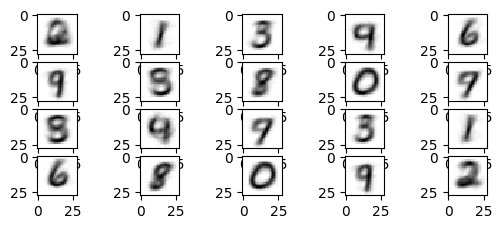

In [44]:
# cluster center를 잘 구했는지 확인차 실행
iter = 1
for name in names:
    for cluster_center_cord, cluster_center_label in zip(clusterCenterCordDict[name],clusterCenterLabelDict[name]):
        print("{} cluster center label : {}".format(name, cluster_center_label))
        plt.subplot(8,5,iter)
        iter+=1
        plt.imshow((cluster_center_cord.reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

In [48]:
# KNN classifier를 만들자 >> cluster center들을 이용해서
KNN_Dict = {}
for name in names:
    KNN_Dict[name] = KNeighborsClassifier(n_neighbors=1).fit(clusterCenterCordDict[name], clusterCenterLabelDict[name])

# test set으로는 그냥 mnist set 전체를 사용하자.
for name in names:
    accuracy = KNN_Dict[name].score(mnist_data_test, mnist_target_test)
    print("{}'s accuracy : {}".format(name, accuracy))

PCA's accuracy : 0.5604571428571429
KernelPCA's accuracy : 0.5674571428571429


prediction 1 : 7
prediction 2 : 6
prediction 3 : 4
prediction 4 : 1
prediction 5 : 8
prediction 6 : 2
prediction 7 : 5
prediction 8 : 4
prediction 9 : 7
prediction 10 : 3


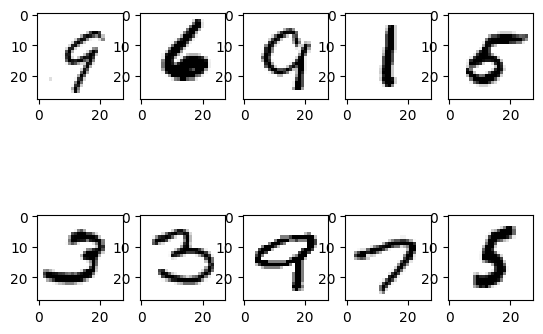

In [46]:
# visualizing은 이전 과제에서 사용한 코드를 이용
# test set에서 랜덤하게 10개를 뽑은 후 이를 출력해서 예측값과 실제 값이 맞는지 틀린지 확인해보자
# PCA 먼저 확인
rand_index = np.random.randint(low=0, high=len(mnist_data), size=10)

for randin, i in zip(rand_index, range(1,len(rand_index)+1)):
    predict = mnist_data[randin].reshape(1,-1)
    print("prediction {} : {}".format(i,KNN_Dict["PCA"].predict(predict)[0]))
    plt.subplot(2,5,i)
    plt.imshow((mnist_data[randin].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

prediction 1 : 3
prediction 2 : 2
prediction 3 : 2
prediction 4 : 5
prediction 5 : 0
prediction 6 : 1
prediction 7 : 3
prediction 8 : 9
prediction 9 : 5
prediction 10 : 6


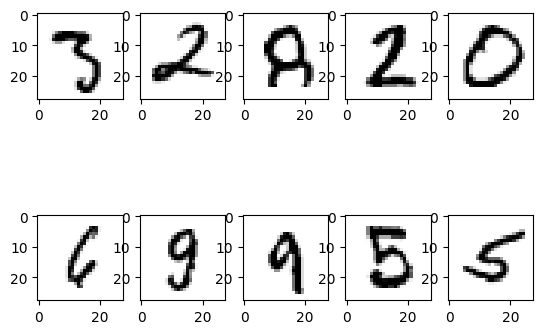

In [54]:
# KernelPCA는 그 다음에 확인
rand_index = np.random.randint(low=0, high=len(mnist_data), size=10)

for randin, i in zip(rand_index, range(1,len(rand_index)+1)):
    predict = mnist_data[randin].reshape(1,-1)
    print("prediction {} : {}".format(i,KNN_Dict["KernelPCA"].predict(predict)[0]))
    plt.subplot(2,5,i)
    plt.imshow((mnist_data[randin].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')